In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as interp
from scipy.optimize import curve_fit

### Интерполяция калибровочных кривых

In [3]:
def expon(x, offset, amp, bias, scale):
    return np.exp((x - bias) / scale) * amp + offset

[ -20.06742466   21.71778308 1783.16979616 1498.19427085]
[3995.91433979  105.28961932   24.48617316  858.6145414 ]


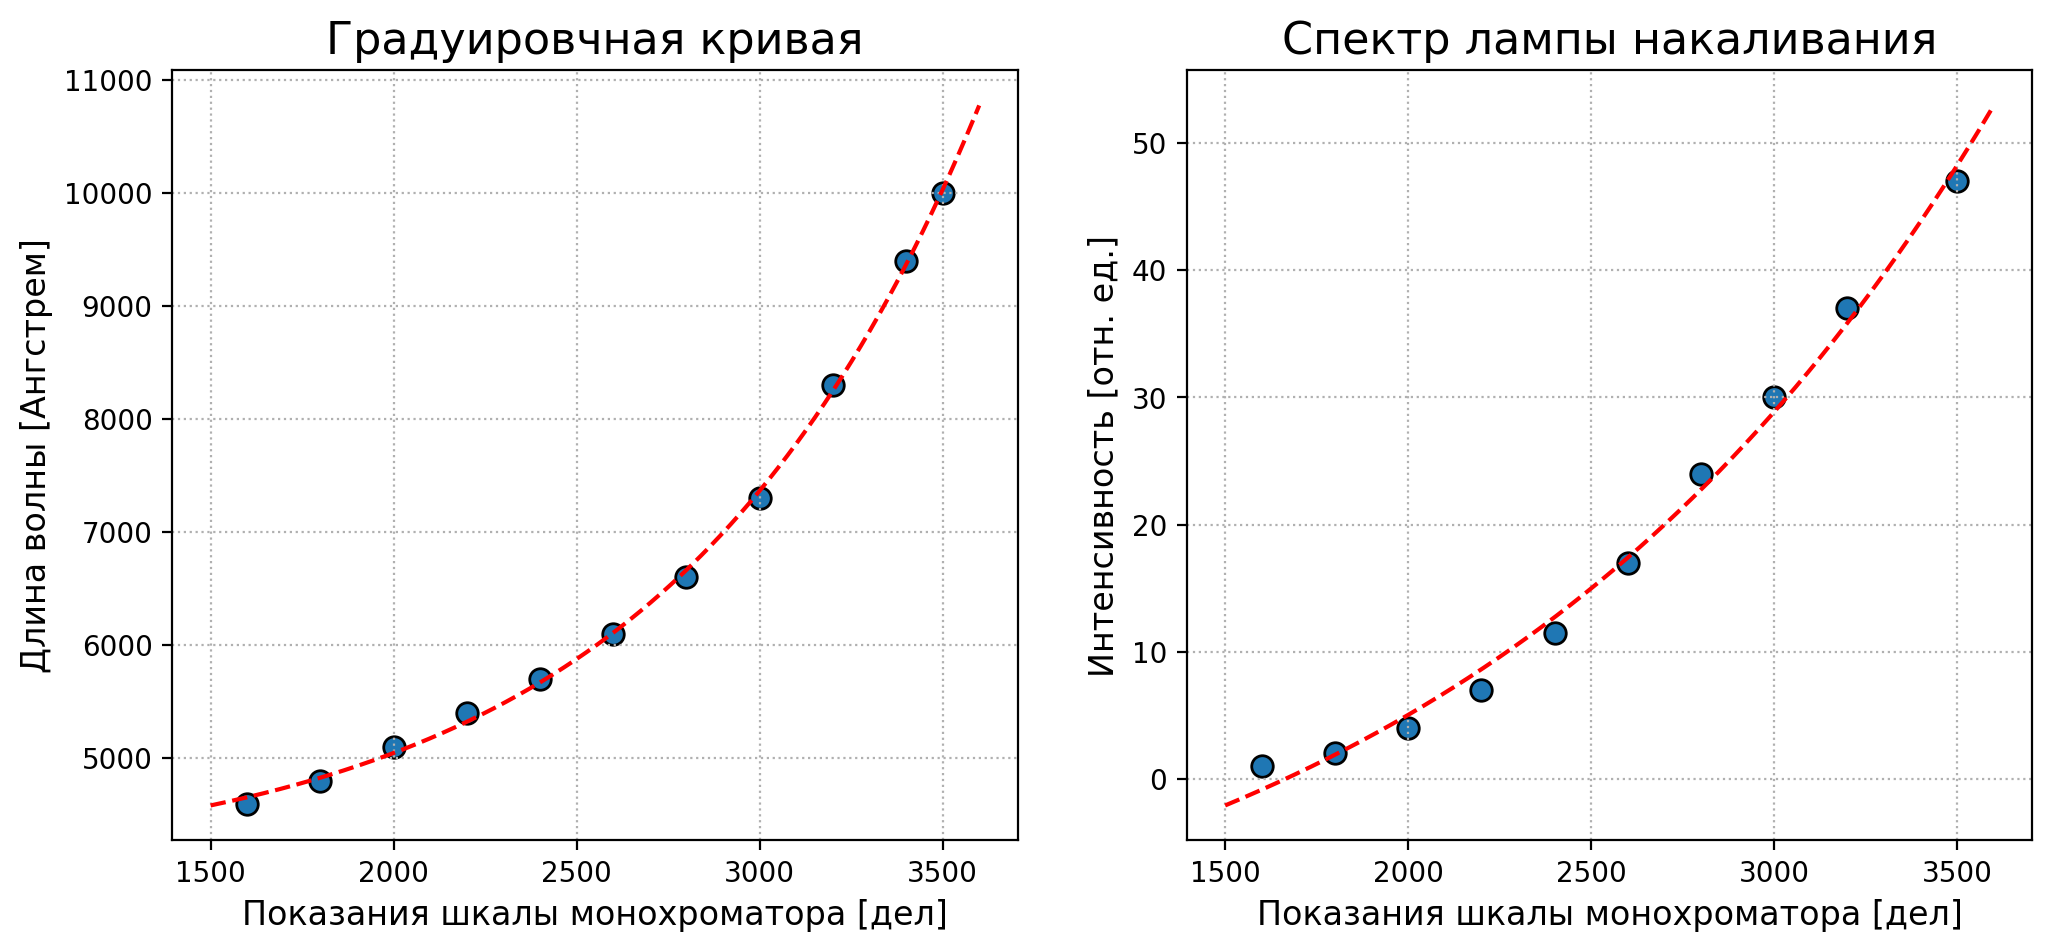

In [4]:
graduirovka = pd.read_csv('graduirovka.csv')
spectrum = pd.read_csv('spectrum.csv')
x_line = np.linspace(1500, 3600, 10000)

param_lambda, _ = curve_fit(expon, graduirovka['monochrom'], graduirovka['energy'],
                            p0 = [4100, 2, 1600, 30])


param_spectrum, _ = curve_fit(expon, spectrum['monochrom'], spectrum['intensity'],
                            p0 = [10, 5, 1200, 30])
print(param_spectrum)

lambda_func = lambda x: expon(x, *param_lambda)
spectrum_func = lambda x: expon(x, *param_spectrum)

print(param_lambda)
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].scatter(graduirovka['monochrom'], graduirovka['energy'], s = 60, edgecolors = 'black')
ax[0].set_title("Градуировчная кривая", fontsize = 16)
ax[0].set_xlabel("Показания шкалы монохроматора [дел]", fontsize = 12)
ax[0].set_ylabel("Длина волны [Ангстрем]", fontsize = 12)
ax[0].grid(ls = ":")
ax[0].plot(x_line,expon(x_line, *param_lambda),
           color = 'red', linestyle = '--')

ax[1].scatter(spectrum['monochrom'], spectrum['intensity'], s = 60, edgecolors = 'black')
ax[1].plot(x_line, spectrum_func(x_line), color = 'red', linestyle = '--')
ax[1].set_title("Спектр лампы накаливания", fontsize = 16)
ax[1].set_xlabel("Показания шкалы монохроматора [дел]", fontsize = 12)
ax[1].set_ylabel("Интенсивность [отн. ед.]", fontsize = 12)
ax[1].grid(ls = ":")




### Нахождение ширины запрещенной зоны CdSe

In [26]:
data_CdSe = pd.read_csv('CdSe_main.csv')
lambd = lambda_func(data_CdSe['monochrom'])
ans = data_CdSe.V / np.max(data_CdSe.V)
ans /= spectrum_func(data_CdSe['monochrom'])
mask = (lambd > 5000) * (lambd < 10000)

x, y = lambd[mask], ans[mask]
y /= np.max(y)

x_line = np.linspace(5000, 9750, 1000)
y_interp = interp.UnivariateSpline(x, y, s = 0.001)(x_line)

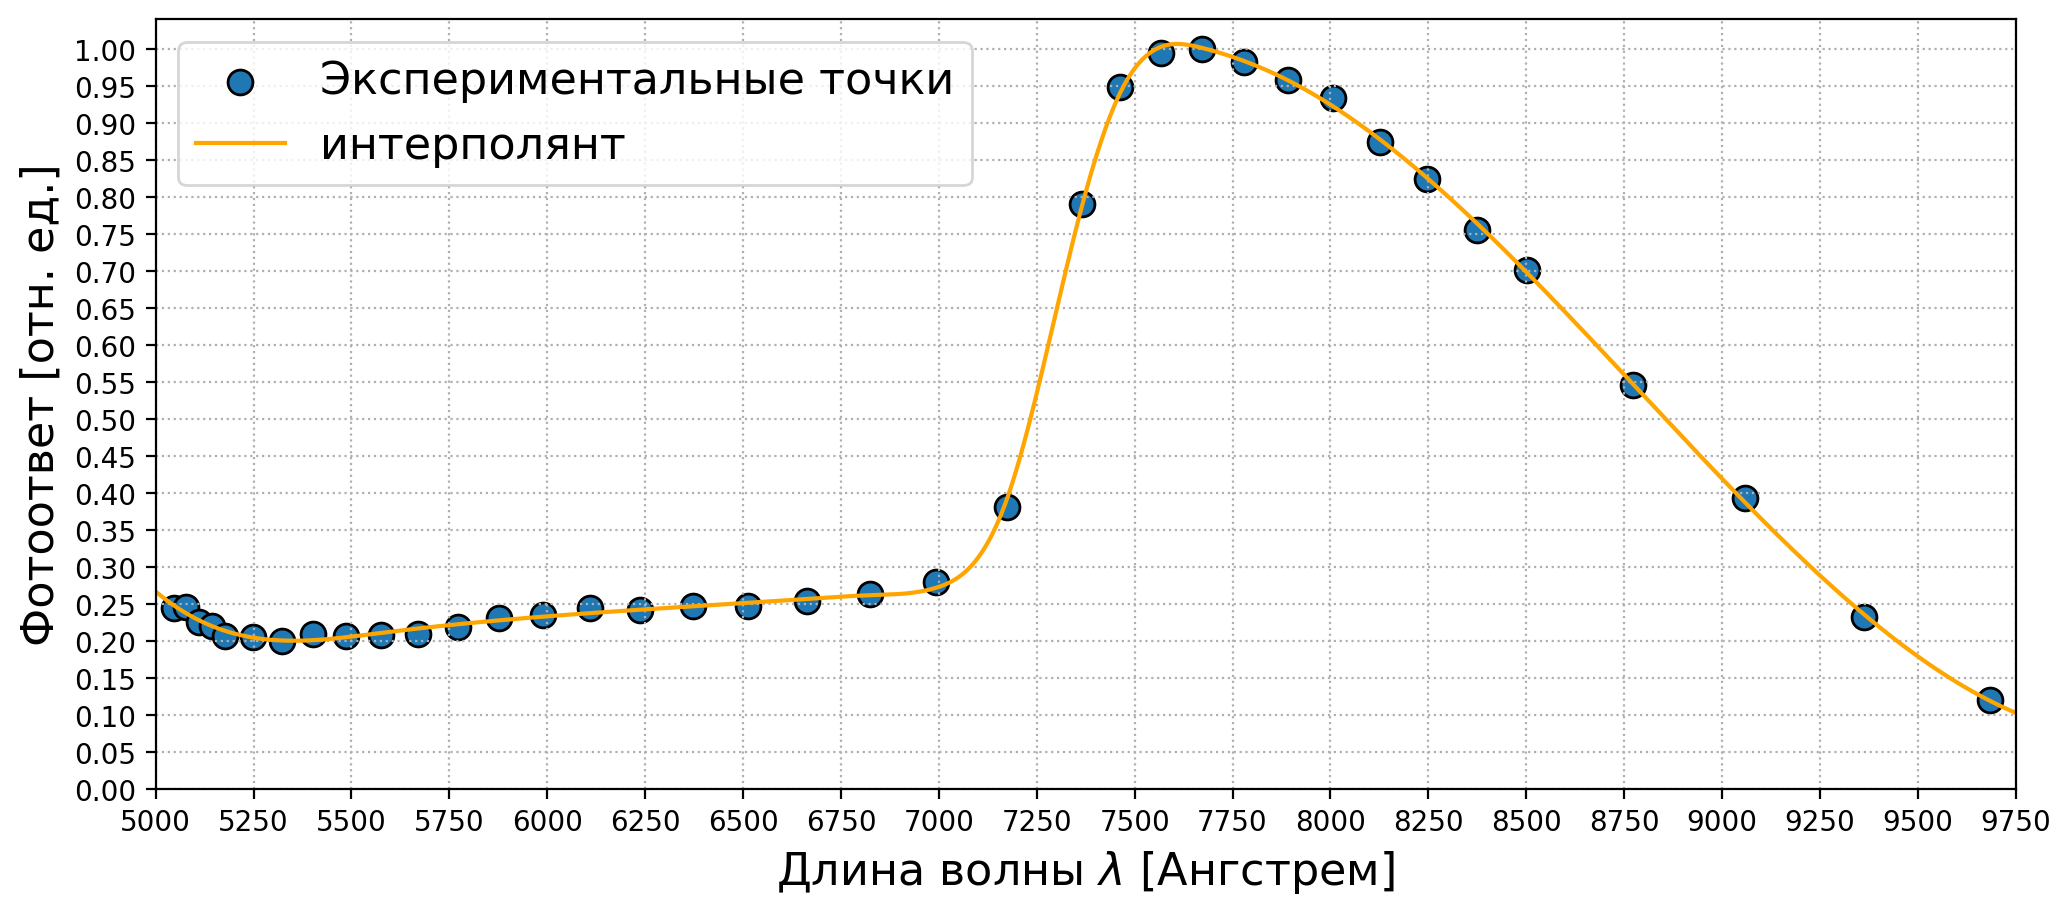

In [27]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(x, y, s = 80, edgecolors='black', label = 'Экспериментальные точки')

plt.xticks(np.arange(5000, 11000, 250))
plt.xlim(5000, 9750)
plt.yticks(np.arange(0, 1.1, 0.05))
plt.ylim(0, 1.04)
plt.grid(ls = ':')
plt.plot(x_line, y_interp, color = 'orange', label = 'интерполянт')
plt.xlabel(r"Длина волны $\lambda$ [Ангстрем]", fontsize = 16)
plt.ylabel(r"Фотоответ [отн. ед.]", fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper left')

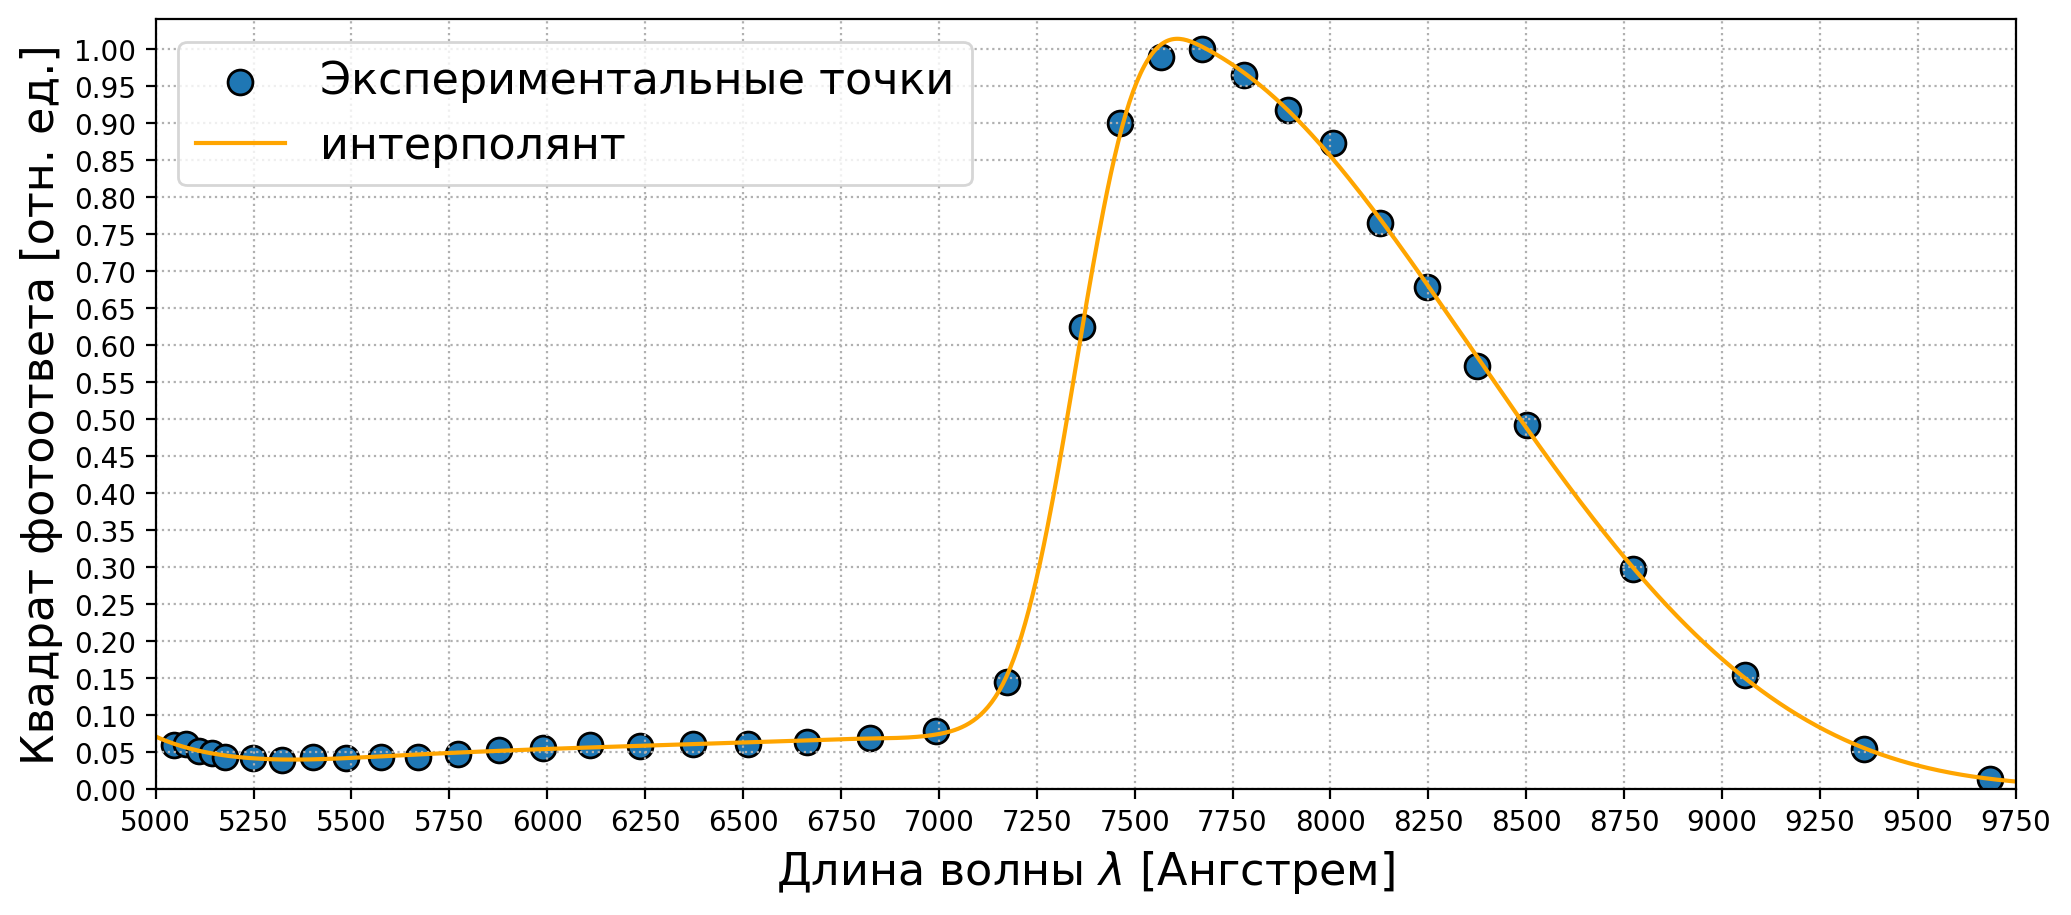

In [28]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(x, np.power(y, 2), s = 80, edgecolors='black', label = 'Экспериментальные точки')

plt.xticks(np.arange(5000, 11000, 250))
plt.xlim(5000, 9750)
plt.yticks(np.arange(0, 1.1, 0.05))
plt.ylim(0, 1.04)
plt.grid(ls = ':')
plt.plot(x_line, np.power(y_interp, 2), color = 'orange', label = 'интерполянт')
plt.xlabel(r"Длина волны $\lambda$ [Ангстрем]", fontsize = 16)
plt.ylabel(r"Квадрат фотоответа [отн. ед.]", fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper left')

### CdS

In [12]:
data_CdS = pd.read_csv('CdS_main.csv')
x = lambda_func(data_CdS['monochrom'])
I = data_CdS['V']  / 40 #Сила Тока в мА


x, I = x[2:], I[2:]
y = I / spectrum_func(data_CdS['monochrom'])[mask]
y += np.abs(np.min(y))
y /= np.max(y)


<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_55826/3324659353.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("Длина волны $\lambda$ [А]", fontsize = 16)


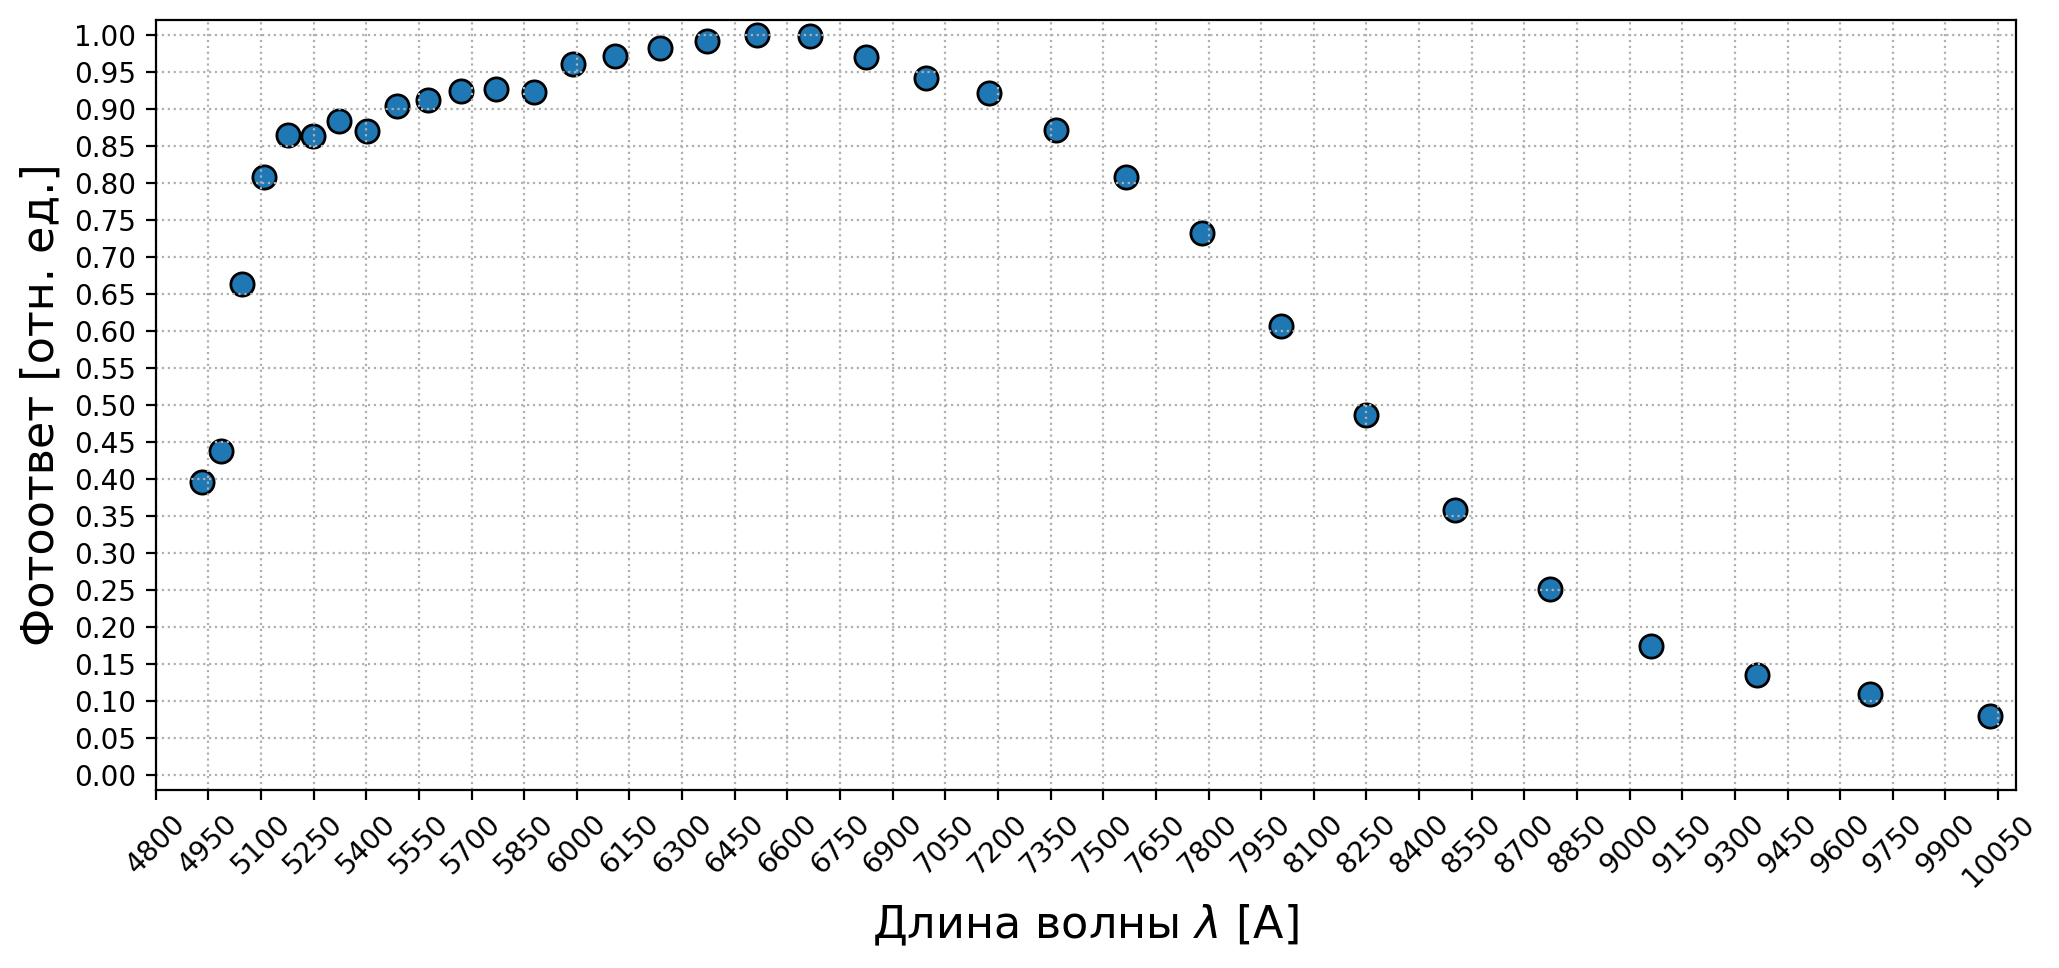

In [24]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.xticks(np.arange(4800, 11000, 150), rotation = 45)
plt.xlim(4800, 10100)

plt.yticks(np.arange(0, 2, 0.05))
plt.ylim(-0.02, 1.02)
plt.grid(ls = ':')
plt.xlabel("Длина волны $\lambda$ [А]", fontsize = 16)
plt.ylabel("Фотоответ [отн. ед.]", fontsize = 16)
plt.scatter(x, y, s = 70, edgecolors='black')

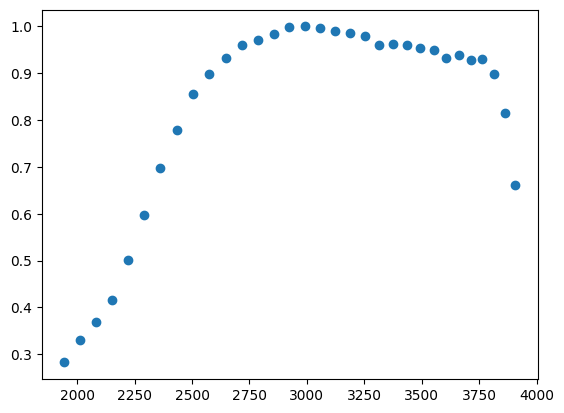

In [31]:
plt.scatter(x, np.sqrt(y))